In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
from google.colab import files
uploaded=files.upload()

Saving blogs.csv to blogs.csv


In [3]:
df=pd.read_csv('blogs.csv')
df

<ipython-input-3-e38c18eb1a5b>:1: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('blogs.csv')


,Data,Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93817,And make her infamous in story.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93818,When such a tempest shook the land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93819,"How could unguarded virtue stand ?""""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93820,- Jonathan Swift (1732),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,Data,Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93822 entries, 0 to 93821
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         79441 non-null  object
 1   Labels       20518 non-null  object
 2   Unnamed: 2   5535 non-null   object
 3   Unnamed: 3   1411 non-null   object
 4   Unnamed: 4   448 non-null    object
 5   Unnamed: 5   145 non-null    object
 6   Unnamed: 6   59 non-null     object
 7   Unnamed: 7   31 non-null     object
 8   Unnamed: 8   22 non-null     object
 9   Unnamed: 9   20 non-null     object
 10  Unnamed: 10  15 non-null     object
 11  Unnamed: 11  11 non-null     object
 12  Unnamed: 12  4 non-null      object
 13  Unnamed: 13  3 non-null      object
 14  Unnamed: 14  2 non-null      object
 15  Unnamed: 15  2 non-null      object
 16  Unnamed: 16  2 non-null      object
 17  Unnamed: 17  2 non-null      object
 18  Unnamed: 18  2 non-null      object
 19  Unnamed: 19  2 non-null  

In [6]:
df['Labels'].value_counts()

,count
Labels,
,165
alt.atheism,117
and,89
Inc.,79
talk.politics.misc,61
...,...
keep him healthy and,1
he hasn't done too much so far. Sure. he's,1
but those were all solo shots,1


Data cleaning and preprocessing

In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
def clean_text(text):

    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = re.sub(r'\d+', '', text)

    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [10]:
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'\d+', '', text)
        text = ' '.join([word for word in text.split() if word not in stop_words])

    else:

        text = ''
    return text

Feature extraction using TF-IDF

In [15]:

df['Cleaned_Data'] = df['Data'].apply(clean_text)

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['Cleaned_Data']).toarray()

In [17]:
y = df['Labels']
y

,Labels
0,alt.atheism
1,alt.atheism
2,alt.atheism
3,alt.atheism
4,alt.atheism
...,...
93817,NaN
93818,NaN
93819,NaN
93820,NaN


Naive Bayes Model for Text Classification

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:

df['Labels'] = df['Labels'].str.split()

!pip install pandas
import pandas as pd
print(df['Labels'].isnull().sum())


df = df.dropna(subset=['Labels'
X = tfidf.fit_transform(df['Cleaned_Data']).toarray()
y = df['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_model = MultinomialNB()

y_train = y_train.apply(lambda x: x[0] if len(x) > 0 else '')

nb_model.fit(X_train, y_train)

<ipython-input-21-0b09ef0dc9a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Labels'] = df['Labels'].str.split()


0


MultinomialNB()

In [23]:
y_pred = nb_model.predict(X_test)
y_pred


array(['and', '17', 'and', ..., 'and', 'and', 'and'], dtype='<U60')

evaluation

In [27]:
!pip install scikit-learn
from sklearn.metrics import multilabel_confusion_matrix

y_pred = nb_model.predict(X_test)

y_pred = mlb.transform(y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", multilabel_confusion_matrix(y_test, y_pred))

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4104
           1       0.00      0.00      0.00       805

   micro avg       0.00      0.00      0.00      4909
   macro avg       0.00      0.00      0.00      4909
weighted avg       0.00      0.00      0.00      4909
 samples avg       0.00      0.00      0.00      4909

Confusion Matrix:
 [[[   0    0]
  [4104    0]]

 [[3299    0]
  [ 805    0]]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['.', '0', '1', '2', '3', '6', '7', '8', '9', 'I', 'a', 'b', 'c', 'd', 'e', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 's', 't', 'u'] will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precisi

sentiment analysis

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [29]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [30]:
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Cleaned_Data'].apply(get_sentiment)

In [32]:

df['Labels'] = df['Labels'].apply(lambda x: tuple(x) if isinstance(x, list) else x)

sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
print(sentiment_distribution)

Sentiment                                     Negative   Neutral  Positive
Labels                                                                    
()                                            0.164773  0.585227      0.25
(!,)                                          0.000000  1.000000      0.00
(!$M\T(M,)                                    0.000000  1.000000      0.00
(!$P@3,)                                      0.000000  1.000000      0.00
(!%B#U4)NP02\93*IWQN5TJ8-L, 1LAN?@1JHR76T'9)  0.000000  1.000000      0.00
...                                                ...       ...       ...
(|, or, fast., Any, two."")                   0.000000  1.000000      0.00
(|, punishes, his, creatures)                 0.000000  1.000000      0.00
(|""No,)                                      0.000000  1.000000      0.00
(|MKS|, 35, King, St., North, mike@mks.com)   0.000000  1.000000      0.00
(||, UUNET:uunet!bcr!fist)                    0.000000  1.000000      0.00

[17247 rows x 3 columns]

visualization

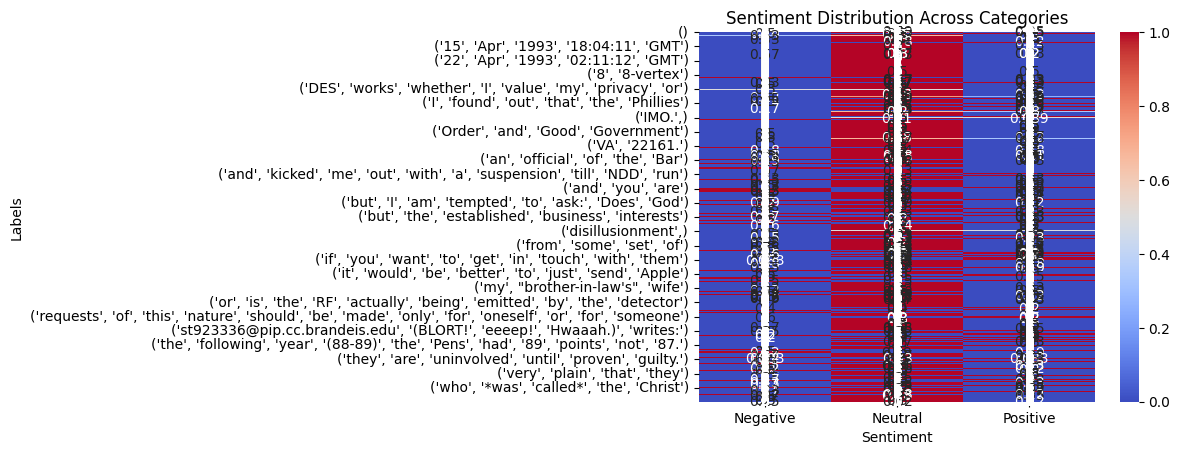

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sentiment_distribution, annot=True, cmap='coolwarm')
plt.title('Sentiment Distribution Across Categories')
plt.show()

evaluation

In [34]:
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4104
           1       0.00      0.00      0.00       805

   micro avg       0.00      0.00      0.00      4909
   macro avg       0.00      0.00      0.00      4909
weighted avg       0.00      0.00      0.00      4909
 samples avg       0.00      0.00      0.00      4909



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print("Sentiment Analysis Distribution:\n", sentiment_distribution)

Sentiment Analysis Distribution:
 Sentiment                                     Negative   Neutral  Positive
Labels                                                                    
()                                            0.164773  0.585227      0.25
(!,)                                          0.000000  1.000000      0.00
(!$M\T(M,)                                    0.000000  1.000000      0.00
(!$P@3,)                                      0.000000  1.000000      0.00
(!%B#U4)NP02\93*IWQN5TJ8-L, 1LAN?@1JHR76T'9)  0.000000  1.000000      0.00
...                                                ...       ...       ...
(|, or, fast., Any, two."")                   0.000000  1.000000      0.00
(|, punishes, his, creatures)                 0.000000  1.000000      0.00
(|""No,)                                      0.000000  1.000000      0.00
(|MKS|, 35, King, St., North, mike@mks.com)   0.000000  1.000000      0.00
(||, UUNET:uunet!bcr!fist)                    0.000000  1.000000  